## DATA:

In [23]:
data[:10]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## LETS PERFORM SOME EDA:

#### BASIC METRICS:

In [25]:
data.shape

(768, 9)

In [26]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

#### SKEW:

In [69]:
skew = data.skew()
skew

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

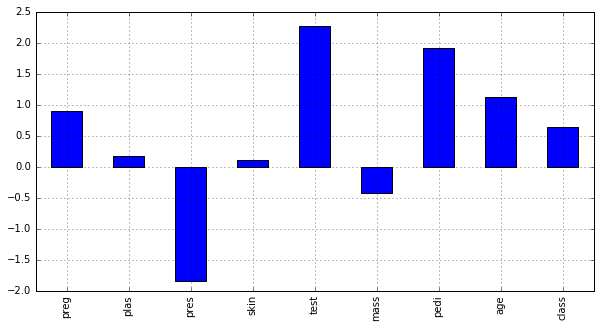

In [406]:
plt.figure(figsize=(10,5))
skew.plot(kind='bar',grid=True)
plt.xticks(range(len(skew)),data.columns)
plt.show()

#### KURTOSIS

In [66]:
kurtosis = data.kurtosis()

preg     0.159220
plas     0.640780
pres     5.180157
skin    -0.520072
test     7.214260
mass     3.290443
pedi     5.594954
age      0.643159
class   -1.600930
dtype: float64

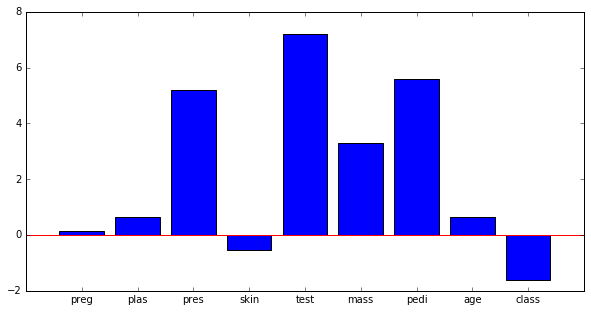

In [420]:
plt.figure().set_size_inches(10,5)
plt.bar(range(len(data.columns)),kurtosis,align='center')
plt.xticks(range(len(data.columns)),data.columns)
plt.axhline(0,color='r')
plt.show()

#### STANDARD DEVIATION

In [113]:
std

preg       3.369578
plas      31.972618
pres      19.355807
skin      15.952218
test     115.244002
mass       7.884160
pedi       0.331329
age       11.760232
class      0.476951
dtype: float64

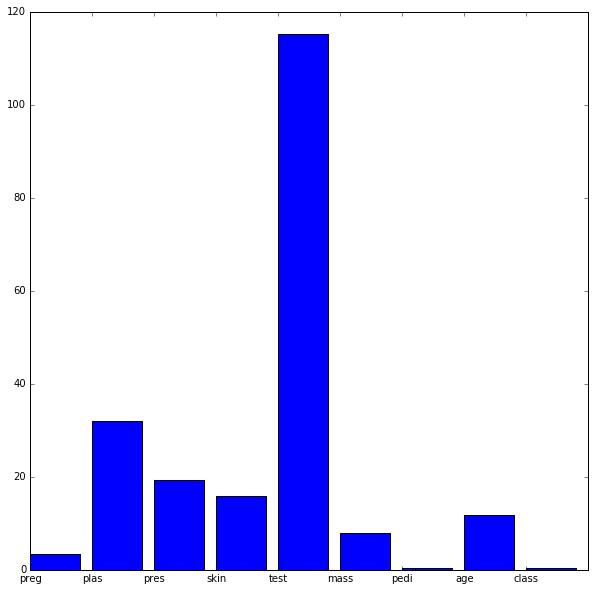

In [112]:
std = data.std()
fig = plt.figure(figsize=(10,10))
plt.bar(range(len(std)),std)
plt.xticks(range(len(std)),data.columns)
plt.show()

#### DENSITY PLOT

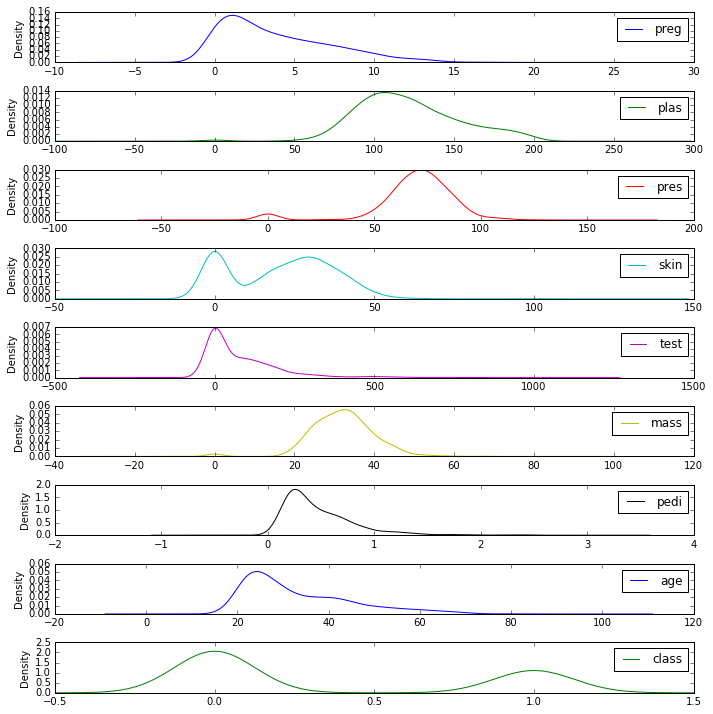

In [106]:
data.plot(kind='kde',subplots=True,sharex=False,figsize=(10,10))
plt.tight_layout()
plt.show()

#### BASIC PLOT:

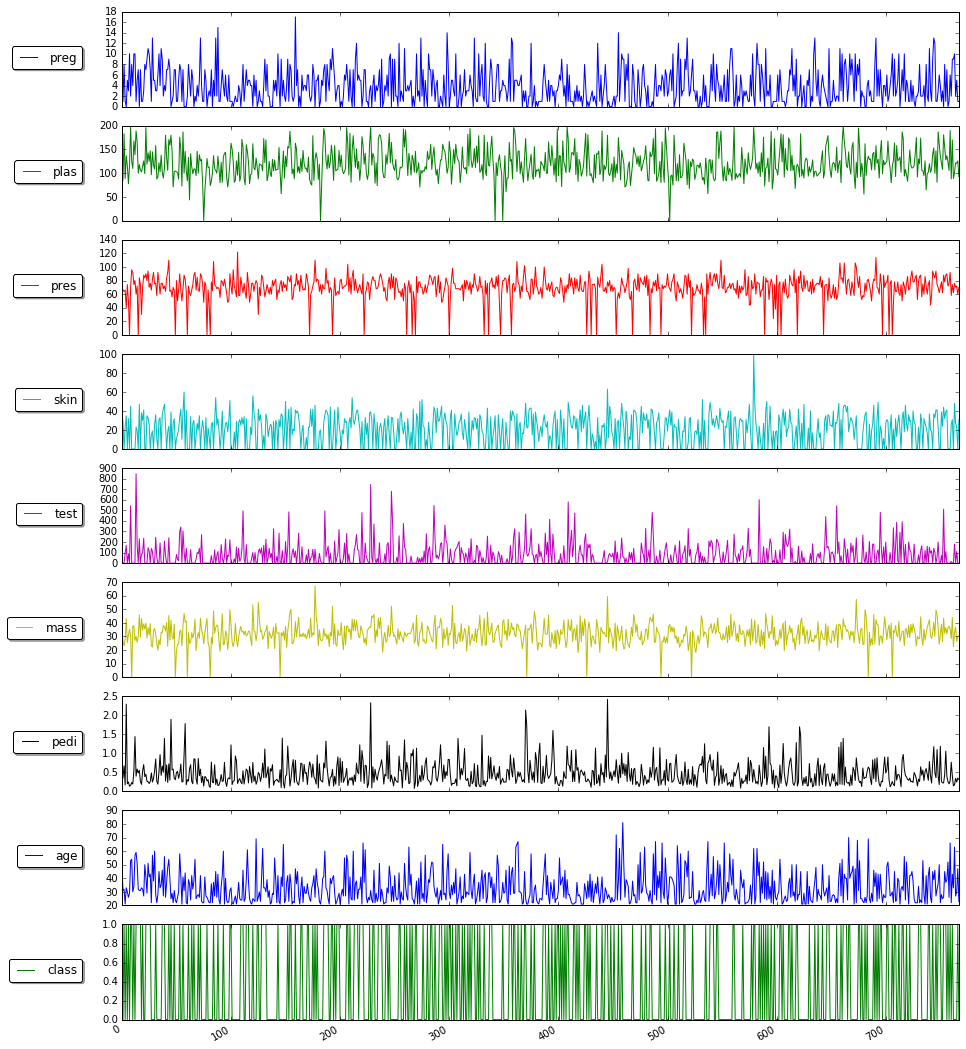

In [171]:
data.plot(subplots=True,figsize=(15,20),legend=False)
[ax.legend(bbox_to_anchor=(-.04, 0.7),shadow=True,fancybox=True) for ax in plt.gcf().axes]
plt.show()

---

### SCAN THE DATA COLUMN HEADS AND TAILS FOR ARTIFACTS

In [120]:
def df_scanner(data_frame,head_num,tail_num):
    all_values = []
    for column in [str(x) for x in data_frame]:
        sorter_1 = sorted(set(data_frame[column]),reverse=False)[:head_num]
        sorter_2 = sorted(set(data_frame[column]),reverse=True)[:head_num]
        sorter_1 = [[x,type(x)] for x in sorter_1]
        sorter_2 = [[x,type(x)] for x in sorter_2]
        all_values.append([column,sorter_1,sorter_2])
    return(all_values)
df_scanner(data,3,3)

[['preg',
  [[0, numpy.int64], [1, numpy.int64], [2, numpy.int64]],
  [[17, numpy.int64], [15, numpy.int64], [14, numpy.int64]]],
 ['plas',
  [[0, numpy.int64], [44, numpy.int64], [56, numpy.int64]],
  [[199, numpy.int64], [198, numpy.int64], [197, numpy.int64]]],
 ['pres',
  [[0, numpy.int64], [24, numpy.int64], [30, numpy.int64]],
  [[122, numpy.int64], [114, numpy.int64], [110, numpy.int64]]],
 ['skin',
  [[0, numpy.int64], [7, numpy.int64], [8, numpy.int64]],
  [[99, numpy.int64], [63, numpy.int64], [60, numpy.int64]]],
 ['test',
  [[0, numpy.int64], [14, numpy.int64], [15, numpy.int64]],
  [[846, numpy.int64], [744, numpy.int64], [680, numpy.int64]]],
 ['mass',
  [[0.0, numpy.float64],
   [18.199999999999999, numpy.float64],
   [18.399999999999999, numpy.float64]],
  [[67.099999999999994, numpy.float64],
   [59.399999999999999, numpy.float64],
   [57.299999999999997, numpy.float64]]],
 ['pedi',
  [[0.078, numpy.float64],
   [0.084000000000000005, numpy.float64],
   [0.085000000000

>><i><b>no artifacts found at heads or tails...

---

## CORRELATION:

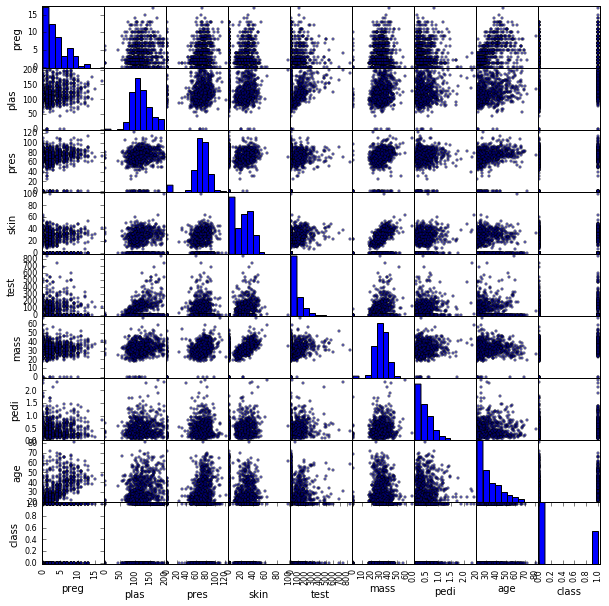

In [81]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data,figsize=(10,10))
plt.show()

In [395]:
correlations = data.corr()
correlations

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### CORRELATION COLOR MATRIX:

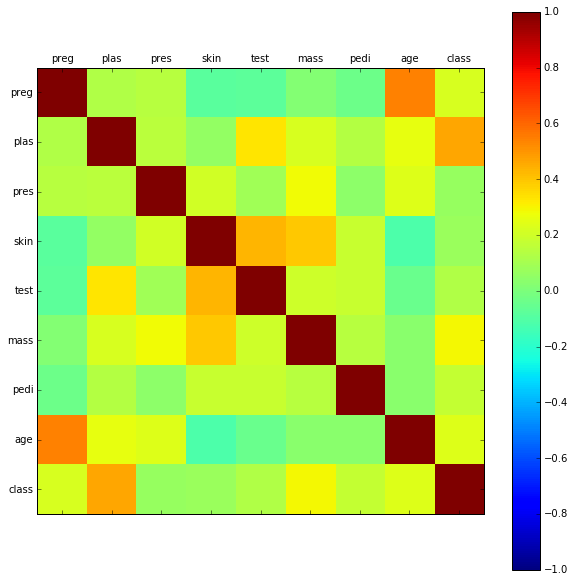

In [400]:
col_names = correlations.columns
matrix_len = range(len(correlations))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)

ax.set_xticks(matrix_len)
ax.set_yticks(matrix_len)

ax.set_xticklabels(col_names)
ax.set_yticklabels(col_names)

plt.show()

---

#### BOXPLOTS:

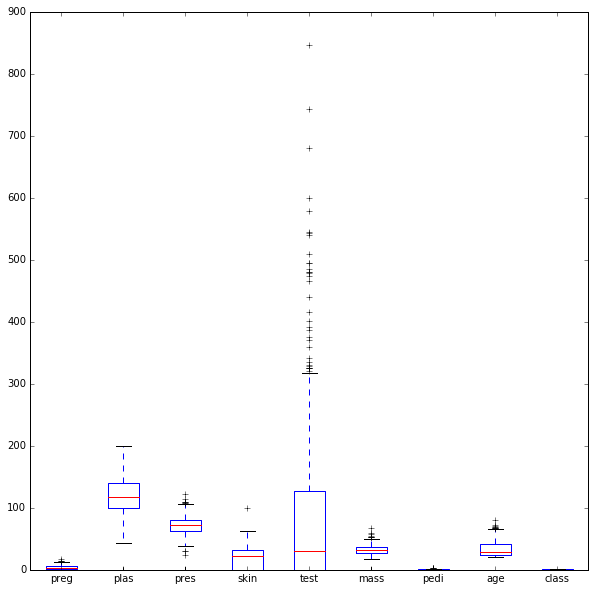

In [424]:
data.plot(kind='box',figsize=(10,10))

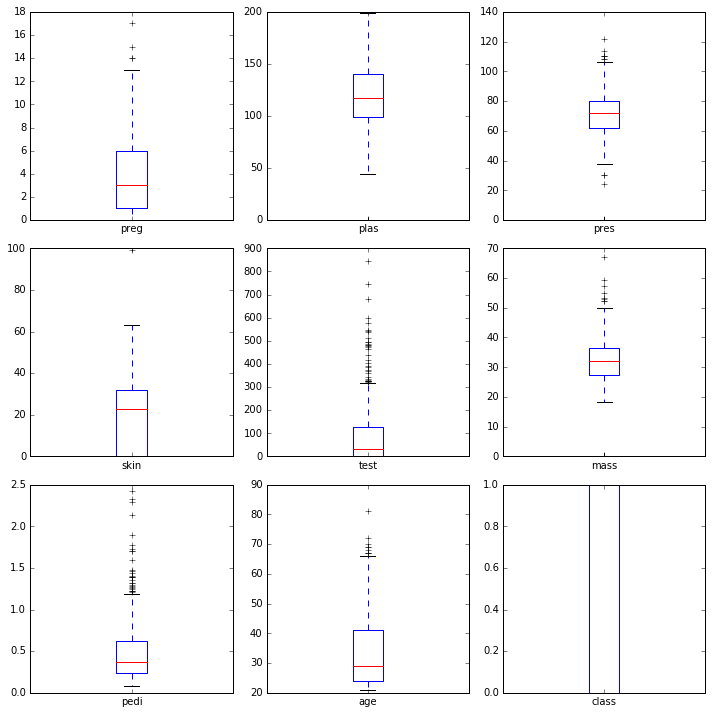

In [430]:
data.plot(kind='box',figsize=(10,10),layout=(3,3),subplots=True,sharex=False,sharey=False)
plt.tight_layout()
plt.show()

---

## CODEX:

In [2]:
#pull data from github and turn into dataframe
import requests
import urllib2
import io
url = 'https://raw.githubusercontent.com/YashaFigo/PRACTICE_ASSETS/master/PIMA%2520INDIANS%2520DATASET/pima_indians_complete.csv'
raw_data = requests.get(url).content
data = pd.read_csv(io.StringIO(raw_data.decode('utf-8')),index_col=0)

In [37]:
#other imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline